In [3]:
from face_detector_image_generator import face_detection_and_capture

# import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

## **Deteksi Titik Kunci pada Wajah Menggunakan Jaringan Saraf Tiruan**
---

Setelah kita belajar mendeteksi wajah menggunakan metode Viola-Jones, langkah berikutnya adalah mendeteksi titik-titik kunci pada wajah menggunakan jaringan saraf tiruan (neural network). Titik-titik kunci ini bisa mencakup posisi mata, hidung, mulut, dan sebagainya.

#### Apa Itu Deteksi Titik Kunci Wajah?

**Deteksi titik kunci wajah** adalah proses menemukan titik-titik spesifik pada wajah, seperti ujung mata, sudut bibir, atau ujung hidung. Ini lebih rumit dibandingkan deteksi objek biasa karena kita harus menemukan banyak titik pada berbagai posisi dan orientasi di wajah, bukan hanya empat sudut dari kotak pembatas.

#### Langkah-langkah dalam Deteksi Titik Kunci

1. **Deteksi Wajah**: Pertama-tama, kita harus mendeteksi wajah dalam gambar, biasanya dengan menempatkannya dalam sebuah kotak pembatas (bounding box).
  
2. **Deteksi Titik Kunci**: Setelah wajah ditemukan, kita menggunakan jaringan saraf tiruan untuk mendeteksi titik-titik kunci pada wajah tersebut. Ini berarti kita harus menemukan lebih dari 10 titik berbeda yang merepresentasikan bagian-bagian penting dari wajah.

#### Menggunakan Data untuk Pelatihan

Untuk melatih jaringan saraf tiruan agar bisa mendeteksi titik kunci dengan baik, kita memerlukan banyak data. Salah satu sumber data yang bagus adalah dari Kaggle, di mana terdapat banyak gambar wajah beserta titik-titik kuncinya. Misalnya, tantangan deteksi titik kunci wajah di Kaggle menyediakan file CSV yang berisi link ke 7.049 gambar (berukuran 96 x 96 piksel), masing-masing dengan 15 titik kunci.

#### Proses Pelatihan

Untuk melatih model deteksi titik kunci:
1. **Kumpulkan Data**: Kumpulkan gambar wajah dan tandai titik-titik kuncinya.
2. **Persiapkan Data**: Format data tersebut agar bisa digunakan oleh jaringan saraf tiruan.
3. **Latih Model**: Gunakan data tersebut untuk melatih model jaringan saraf tiruan agar dapat mendeteksi titik-titik kunci pada wajah baru.

#### Mengapa Ini Penting?

Deteksi titik kunci pada wajah sangat berguna dalam berbagai aplikasi, seperti:
- **Pengenalan Wajah**: Membantu komputer mengenali siapa orang dalam gambar.
- **Animasi Wajah**: Digunakan dalam pembuatan karakter animasi yang realistis.
- **Analisis Ekspresi Wajah**: Membantu memahami emosi seseorang dari ekspresi wajahnya.

#### Kesimpulan

Deteksi titik kunci pada wajah adalah langkah lanjutan setelah deteksi wajah yang memungkinkan kita untuk menganalisis wajah dengan lebih detail. Dengan menggunakan jaringan saraf tiruan, kita bisa mendeteksi titik-titik kunci ini secara akurat, meskipun ini adalah tugas yang lebih rumit dibandingkan deteksi objek biasa.

Semoga penjelasan ini membantu! Jika ada yang masih membingungkan atau ada yang ingin ditanyakan lebih lanjut, jangan ragu untuk bertanya.

### **Mempersiapkan Dataset untuk Deteksi Titik Kunci Wajah**
---

Untuk melatih komputer agar bisa mendeteksi titik kunci pada wajah, kita perlu mengumpulkan dan mempersiapkan dataset yang berisi banyak gambar wajah. Berikut adalah langkah-langkah untuk membuat dataset ini menggunakan webcam di komputer kamu.

### Langkah-langkah Membuat Dataset

1. **Memuat Haar Cascade Classifier**
   - Pertama, kita perlu memuat classifier Haar cascade yang akan kita gunakan untuk mendeteksi wajah. Classifier ini adalah file XML yang bisa kamu temukan di folder OpenCV kamu.
   - Contoh kode:
     ```python
     face_cascade = cv2.CascadeClassifier('path_to_haarcascade_frontalface_default.xml')
     ```

2. **Mengatur Kamera**
   - Kita menggunakan webcam untuk mengambil gambar wajah. Perintah `cv2.VideoCapture(0)` digunakan untuk mengakses kamera internal komputer. Jika kamu menggunakan kamera eksternal, gunakan `cv2.VideoCapture(1)`.
   - Contoh kode:
     ```python
     cam = cv2.VideoCapture(0)
     ```

3. **Mendeteksi Wajah dan Menampilkan di Layar**
   - Setiap frame yang dibaca dari kamera diproses untuk mendeteksi wajah menggunakan classifier yang kita muat di langkah 1. Jika wajah terdeteksi, kotak pembatas akan digambar di sekitar wajah dan hanya bagian wajah yang akan ditampilkan di layar.
   - Contoh kode:
     ```python
     while(True):
         ret, frame = cam.read()
         faces = face_cascade.detectMultiScale(frame, 1.3, 5)
         for (x, y, w, h) in faces:
             if w > 130:
                 detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
                 cv2.imshow("test", detected_face)
         if not ret:
             break
         k = cv2.waitKey(1)
     ```

4. **Menyimpan Gambar**
   - Gambar wajah yang terdeteksi kemudian diubah ukurannya menjadi 299x299 piksel dan disimpan dalam folder yang sudah kamu buat (misalnya, folder `dataset`). Setiap kali kamu menekan tombol spasi, gambar akan disimpan dengan nomor file yang terus bertambah.
   - Contoh kode:
     ```python
     faceresize = cv2.resize(detected_face, (299, 299))
     img_name = "dataset/opencv_frame_{}.jpg".format(img_counter)
     cv2.imwrite(img_name, faceresize)
     ```

5. **Mengumpulkan dan Mengannotasi Gambar**
   - Ambil sekitar 100 gambar wajah dengan berbagai posisi dan orientasi. Lebih banyak gambar akan memberikan hasil deteksi yang lebih baik. Untuk anotasi (penandaan) titik kunci pada wajah, kamu bisa menggunakan alat anotasi seperti VGG annotator.
   - VGG annotator memungkinkan kamu untuk menandai titik-titik kunci seperti mata, hidung, dan bibir pada gambar. Misalnya, kamu bisa menandai 16 titik pada wajah yang mencakup mata kiri, mata kanan, hidung, bibir, dan bentuk wajah luar.

### Kesimpulan

Dengan mengikuti langkah-langkah ini, kamu bisa membuat dataset sendiri yang berisi gambar-gambar wajah dengan titik-titik kunci yang telah dianotasi. Dataset ini sangat penting untuk melatih model jaringan saraf tiruan agar bisa mendeteksi titik-titik kunci pada wajah dengan akurat. Proses ini memerlukan kerja keras dan ketelitian, tetapi hasilnya akan sangat bermanfaat untuk berbagai aplikasi seperti pengenalan wajah dan analisis ekspresi wajah.

In [2]:
# face_cascade_path = './Assets/data/haarcascades/haarcascade_frontalface_default.xml'
# face_detection_and_capture(face_cascade_path=face_cascade_path, output_dir='./Assets/Images/', img_size=(299, 299), alpha=0.1, offset=50)

### **Memproses Data Titik Kunci**
---

Ketika kita ingin mendeteksi titik-titik penting di wajah (seperti mata, hidung, dan mulut), kita membutuhkan data yang sudah di-annotate. Ada alat yang disebut VGG annotator yang bisa membantu kita dengan ini. Alat ini akan menghasilkan file CSV yang berisi koordinat (x, y) untuk setiap titik kunci pada setiap gambar.

#### Mengapa Ini Penting?

1. **Efisiensi**: Python kita tidak akan mencari banyak file gambar secara langsung, tetapi akan mencari data dari file CSV.
2. **Pengolahan Data**: Untuk setiap file CSV, ada 16 titik kunci yang harus diproses.
3. **Alternatif**: Ini adalah alternatif untuk menggunakan metode `ImageDataGenerator` dari Keras yang biasa digunakan untuk mengelola banyak file dalam direktori.

#### Langkah-Langkahnya

Untuk memudahkan pemahaman, kita akan membagi proses ini menjadi dua bagian:

1. **Praproses sebelum input ke dalam kode Keras-Python**
2. **Praproses dalam kode Keras-Python**

#### Praproses Sebelum Input ke Keras-Python

Sebelum kita memasukkan data ke dalam model Keras, kita perlu membersihkan dan menyiapkan data dari file CSV yang dihasilkan oleh VGG annotator. Proses ini melibatkan membaca file CSV, mengekstrak koordinat titik kunci, dan memastikan bahwa data siap untuk digunakan oleh model.

#### Praproses Dalam Kode Keras-Python

Setelah data siap, kita akan menggunakan Keras (sebuah pustaka untuk membuat dan melatih model pembelajaran mendalam) untuk memproses data lebih lanjut. Di sini, kita akan memastikan bahwa data diolah dengan benar saat dilatih oleh model.

#### Kesimpulan

Memproses data titik kunci memerlukan dua langkah utama: praproses sebelum memasukkan data ke dalam model Keras, dan praproses dalam model Keras itu sendiri. Dengan cara ini, kita memastikan bahwa data yang kita gunakan bersih, terstruktur, dan siap digunakan untuk melatih model pembelajaran mendalam yang akurat dan efisien.

In [33]:
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# train_path = './Assets/trainimgface.csv'
# test_path = './Assets/testimgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [35]:
train_data['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [36]:
train_data_copy = train_data.copy(deep=True)

In [37]:
train_data_copy['Image']=train_data_copy['Image'].apply(lambda x: np.fromstring(x, sep=' ') / 255.0)

In [43]:
print(f"image size: {len(train_data_copy['Image'][0])}")

image size: 9216


In [44]:
print(f"image size: {np.sqrt(len(train_data_copy['Image'][0]))}")

image size: 96.0


In [45]:
train_data_copy['Image']=train_data_copy['Image'].apply(lambda x: x.reshape(96, 96))

In [46]:
train_data_copy['Image'][:4]

0    [[0.9333333333333333, 0.9254901960784314, 0.92...
1    [[0.8588235294117647, 0.8431372549019608, 0.8,...
2    [[0.5647058823529412, 0.5568627450980392, 0.62...
3    [[0.7568627450980392, 0.7529411764705882, 0.75...
Name: Image, dtype: object

In [47]:
test_data[:4]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...


In [48]:
# Fungsi untuk menemukan kolom dengan NaN dan batas jumlah NaN
def find_nan_columns(df, name_columns, max_display=200):
    df_copy=df.copy(deep=True)
    
    nan_columns = {}
    for index, row in df_copy.iterrows():
        nan_cols = row.index[row.isna()].tolist()
        if len(nan_cols) > max_display:
            nan_columns[row[name_columns]] = f"Jumlah NaN: {len(nan_cols)}"
        else:
            nan_columns[row[name_columns]] = nan_cols

    # Menampilkan kolom yang bernilai NaN
    for key, value in nan_columns.items():
        if isinstance(value, list):
            value_str = ' '.join(map(str, value))
        else:
            value_str = value
        print(f"{key}:\t{value_str}")


transformed_train_data = train_data_copy.T.reset_index().rename(columns={'index':'facial_key_points'})
max_display = 9 # Batas jumlah NaN yang akan ditampilkan
nan_columns = find_nan_columns(transformed_train_data, name_columns='facial_key_points', max_display=max_display)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

In [49]:
train_data_copy['nose_tip_y'].isnull().sum()

0

In [50]:
train_data_copy.shape, test_data.shape

((7049, 31), (1783, 2))

In [51]:
image_size=len(train_data_copy['Image'][0])
image_size

96

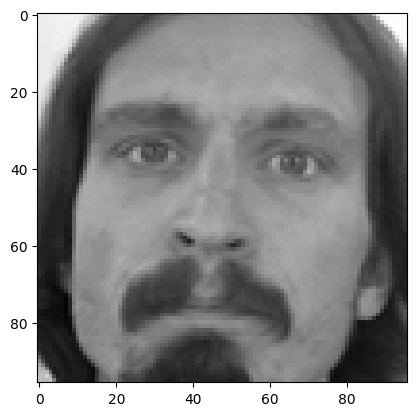

In [52]:
plt.imshow(train_data_copy['Image'][0], cmap='gray')
plt.show()

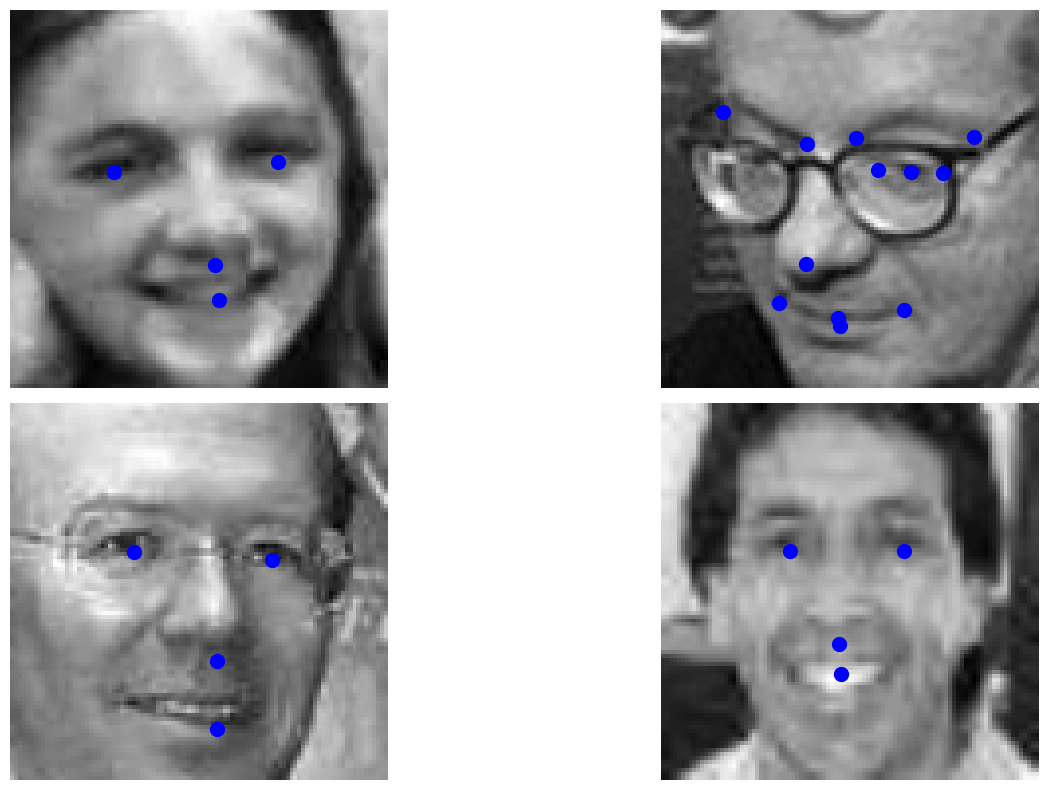

In [55]:
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan beberapa gambar dengan facial key points dalam satu figure
def show_multiple_images_with_keypoints(
        dataframe, 
        keypoints_columns,
        image_column, 
        parent_path=None,
        num_images=5, 
        figsize_per_image=(8, 4), 
        image_size=(96, 96),
        scatter_size=400,
        scatter_color='blue'
    ):
    # Calculate the number of rows and columns needed
    num_columns = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / num_columns)
    figsize = (num_columns * figsize_per_image[0], num_rows * figsize_per_image[1])

    # Membuat plot
    plt.figure(figsize=figsize)
    
    # Memilih index secara acak untuk menampilkan gambar
    indices = np.random.choice(len(dataframe), num_images, replace=False)
    
    for i, index in enumerate(indices):
        # Mendapatkan data gambar dari kolom
        image_data = dataframe[image_column][index]
        img_exts = ['jpg', 'jpeg', 'png', 'tiff', 'bmp', 'gif', 'heif', 'raw', 'webp', 'svg', 'psd', 'ico', 'pdf']

        # Mengecek apakah data gambar adalah path ke file gambar atau string data gambar
        if isinstance(image_data, str) and any(image_data.endswith(ext) for ext in img_exts):
            # Jika path ke file gambar
            image = cv2.imread(parent_path + image_data, cv2.IMREAD_GRAYSCALE)
        elif isinstance(image_data, str):
            # Jika string data gambar
            image = np.fromstring(image_data, sep=' ').astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        elif len(image_data.shape) == 1:
            # Jika data gambar berupa array angka
            image = np.array(image_data).astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        else:
            image = np.array(image_data).astype(np.float32)
        
        # Menampilkan gambar pada subplot
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(image, cmap='gray')
        
        # Membuat dictionary key points
        keypoints = {
            key: (dataframe.loc[index, key], dataframe.loc[index, key.replace('x', 'y')])
            for key in keypoints_columns if 'x' in key
        }

        # Menambahkan titik key points pada gambar
        for key, (x, y) in keypoints.items():
            plt.scatter(x, y, s=scatter_size, marker='.', c=scatter_color)
        
        # Menghilangkan axis
        plt.axis('off')
    
    # Menampilkan figure
    plt.tight_layout()
    plt.show()

# Memuat dataset
keypoints_columns = train_data_copy.columns[:-1]

# Menampilkan beberapa gambar beserta facial key points
show_multiple_images_with_keypoints(
    train_data_copy, 
    image_column='Image',
    # parent_path='./Assets/Images/',
    keypoints_columns=keypoints_columns, 
    num_images=4, 
    image_size=(96, 96)
)

In [61]:
samples_test = train_data_copy[:5].copy(deep=True)
samples_test

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[0.9333333333333333, 0.9254901960784314, 0.92..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[0.8588235294117647, 0.8431372549019608, 0.8,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[0.5647058823529412, 0.5568627450980392, 0.62..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[0.7568627450980392, 0.7529411764705882, 0.75..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[0.5764705882352941, 0.5803921568627451, 0.62..."


In [62]:
samples_test_flip_horizontal = samples_test.copy(deep=True)
samples_test_revesed_vertical = samples_test.copy(deep=True)

In [63]:
def flip_horizontal_x(image_width, x):
    return image_width - 1 - x

# Fungsi untuk flip vertikal koordinat y
def flip_vertical_y(image_height, y):
    return image_height - 1 - y

# Daftar kolom yang perlu di-flip horizontal
x_columns = [col for col in samples_test_flip_horizontal.columns if 'x' in col]
y_columns = [col for col in samples_test_revesed_vertical.columns if 'y' in col]

samples_test_flip_horizontal[x_columns] = samples_test_flip_horizontal[x_columns].map(lambda x: flip_horizontal_x(image_width=96, x=x))
samples_test_revesed_vertical[y_columns] = samples_test_revesed_vertical[y_columns].map(lambda y: flip_vertical_y(image_height=96, y=y))

In [64]:
samples_test[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[0.9333333333333333, 0.9254901960784314, 0.92..."


In [65]:
samples_test_flip_horizontal[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,28.966436,39.002274,64.772992,36.421678,35.417925,39.647423,21.869654,39.969997,58.643429,37.389402,...,57.066803,33.804692,79.970165,66.385504,77.388992,51.687398,72.935459,51.869293,84.485774,"[[0.9333333333333333, 0.9254901960784314, 0.92..."


In [66]:
samples_test_revesed_vertical[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,28.966436,55.997726,64.772992,58.578322,35.417925,55.352577,21.869654,55.030003,58.643429,57.610598,...,37.933197,61.195308,15.029835,28.614496,17.611008,43.312602,22.064541,43.130707,10.514226,"[[0.9333333333333333, 0.9254901960784314, 0.92..."


In [67]:
final_train_data = pd.concat([samples_test, samples_test_flip_horizontal, samples_test_revesed_vertical], ignore_index=True)

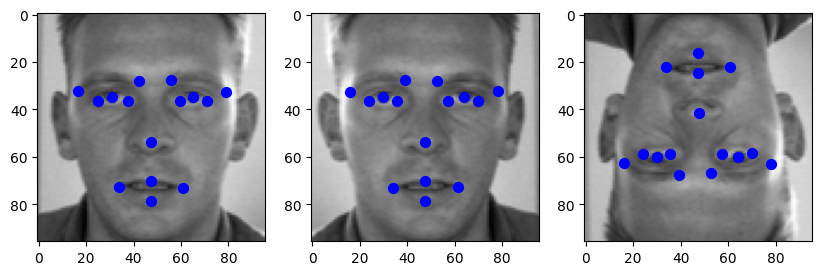

In [69]:
plt.figure(figsize=(10,8))

idx_orig = 2
img_orig = final_train_data['Image'][idx_orig].reshape(96, 96)
keypoints_columns = final_train_data.iloc[[idx_orig], :].drop(columns='Image')

# Membuat dictionary key points
keypoints = {
    key: (final_train_data.loc[idx_orig, key], final_train_data.loc[idx_orig, key.replace('x', 'y')])
    for key in keypoints_columns if 'x' in key
}

plt.subplot(1,3,1)
# Menambahkan titik key points pada gambar
for key, (x, y) in keypoints.items():
    plt.scatter(x, y, s=200, marker='.', c='blue')
plt.imshow(img_orig, cmap='gray')

# ========================================================

idx_flip_h = idx_orig + len(samples_test)
img_flip_h = cv2.flip(final_train_data['Image'][idx_flip_h].reshape(96, 96), 1)
keypoints_columns = final_train_data.iloc[[idx_flip_h], :].drop(columns='Image')

# Membuat dictionary key points
keypoints = {
    key: (final_train_data.loc[idx_flip_h, key], final_train_data.loc[idx_flip_h, key.replace('x', 'y')])
    for key in keypoints_columns if 'x' in key
}

plt.subplot(1,3,2)
# Menambahkan titik key points pada gambar
for key, (x, y) in keypoints.items():
    plt.scatter(x, y, s=200, marker='.', c='blue')
plt.imshow(img_flip_h, cmap='gray')

# ========================================================

idx_flip_v = idx_orig + len(samples_test)*2
img_flip_v = cv2.flip(final_train_data['Image'][idx_flip_v].reshape(96, 96), 0)
keypoints_columns = final_train_data.iloc[[idx_flip_v], :].drop(columns='Image')

# Membuat dictionary key points
keypoints = {
    key: (final_train_data.loc[idx_flip_v, key], final_train_data.loc[idx_flip_v, key.replace('x', 'y')])
    for key in keypoints_columns if 'x' in key
}

plt.subplot(1,3,3)
# Menambahkan titik key points pada gambar
for key, (x, y) in keypoints.items():
    plt.scatter(x, y, s=200, marker='.', c='blue')
plt.imshow(img_flip_v, cmap='gray')
    
plt.show()

### Buat code sebelum-sebelumnya menjadi lebih readable, atau dibuat clean code

In [ ]:
# import re

# # List of column names
# facial_key_points_columns=samples_test.drop(columns='Image').columns

# # Function to reverse the suffixes using regex
# def reverse_suffix(column_name):
#     return re.sub(r'(x|y)$', lambda match: 'y' if match.group(1).lower() == 'x' else 'x', column_name, flags=re.IGNORECASE | re.MULTILINE)

# # Apply the function to each column name
# facial_key_points_columns_reversed = [reverse_suffix(column) for column in facial_key_points_columns]

# # Print the result
# print(f'original: {facial_key_points_columns}')
# print(f'reversed: {facial_key_points_columns_reversed}')

# rename_columns = result = {key: value for key, value in zip(facial_key_points_columns, facial_key_points_columns_reversed)}
# samples_test_revesed.rename(columns=rename_columns, inplace=True)

#### langkah Uji Coba sebelum di ubah menjadi tensorflow datasets:
1. ambil 2 sampel untuk dijadikan percobaan, lalu buat copy dari 2 sampel tersebut gambar beserta facial-keypointnya.
2. setelah di copy maka akan ada 4 gambar dengan 2 gambar dan facial-keypoitnya yang sama.
3. 2 hasil gambar yang di copy lalu di flip secara horizontal untuk di augmentasi.
4. namun untuk facial key-pointya masih belum tercopy, sehingga koordinatnya masih salah.
5. maka perlu di atur dengan menukar sumbu x menjadi y dan y menjadi x.

#### langkah jika berhasil:
1. jika berhasil maka, terapkan untuk seluruh gambar dan facial keypointsnya, dengan kondisi facial keypoinnya suda terflip.
2. sehingga total data menjadi 2 kali lipat dari data asli, namun kondisi gambar pada data copy masih belum terflip.
3. setelah diubah menjadi tensorflow datasets maka gambar pada data copy di flip, dengan melakukan slicing index pada data copy. untuk diterapkannya flip horizontal.
4. jika gagal, maka cari cara lain.

#### validasi hasil preprocessing:
1. menampilkan gambar copy yang sudah terflip beserta facial keypointnya dengan data asli, untuk mengetahui langkah telah sukses.
